<a href="https://colab.research.google.com/github/G17-KBZ/ores5160-2025/blob/main/week11/week11assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Q1. Reading the CSV File (pandas + csv)

	1.	Use the csv module to open and print the first 5 rows of est2018-pop-res.csv.

	2.	Then use pandas.read_csv() to load the same file into a DataFrame.

	•	Display the shape (rows × columns).

	•	Print the list of column names.

	3.	Which column represents total population? Display the top 5 most populous states


In [1]:
import csv
import pandas as pd

# 1. Use csv module to open and print first 5 rows
with open('/content/est2018-pop-res.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        print(row)
        if i == 4:   # Print only first 5 rows (0-indexed)
            break

# 2. Use pandas to load file into DataFrame
df = pd.read_csv('/content/est2018-pop-res.csv')

# Display the shape (rows x columns)
print("DataFrame shape (rows, columns):", df.shape)

# Print the list of column names
print("Column names:", list(df.columns))

# 3. Determine column with total population
# It's typically named like 'POPESTIMATE2018', 'TOTAL POP', etc. (Check printed columns!)
# Example, let's assume the column is named 'POPESTIMATE2018'
pop_col = [col for col in df.columns if 'POP' in col.upper() and 'EST' in col.upper()]
print("Possible total population columns:", pop_col)

# If you identify the correct one, e.g. 'POPESTIMATE2018', run this:
top5_states = df.sort_values(by=pop_col[0], ascending=False).head(5)
print("Top 5 most populous states:")
print(top5_states[['NAME', pop_col[0]]])  # Replace 'NAME' with correct state column


['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']
['010', '0', '0', '00', 'United States', '327167434', '253768092', '77.6']
['040', '3', '6', '01', 'Alabama', '4887871', '3798031', '77.7']
['040', '4', '9', '02', 'Alaska', '737438', '553622', '75.1']
['040', '4', '8', '04', 'Arizona', '7171646', '5528989', '77.1']
DataFrame shape (rows, columns): (53, 8)
Column names: ['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']
Possible total population columns: ['POPESTIMATE2018', 'POPEST18PLUS2018', 'PCNT_POPEST18PLUS']
Top 5 most populous states:
             NAME  POPESTIMATE2018
0   United States        327167434
5      California         39557045
44          Texas         28701845
10        Florida         21299325
33       New York         19542209


Q2. Basic Statistical Analysis (pandas)

	1.	Compute the average population across all states.

	2.	Find which region has the highest total population.

	3.	Plot a bar chart showing the population by region (use matplotlib)

Average population across all states: 12,406,227
Region total populations:
REGION
0    327167434
1     56111079
2     68308744
3    124753948
4     77993663
X      3195153
Name: POPESTIMATE2018, dtype: int64
Region with highest total population: 0


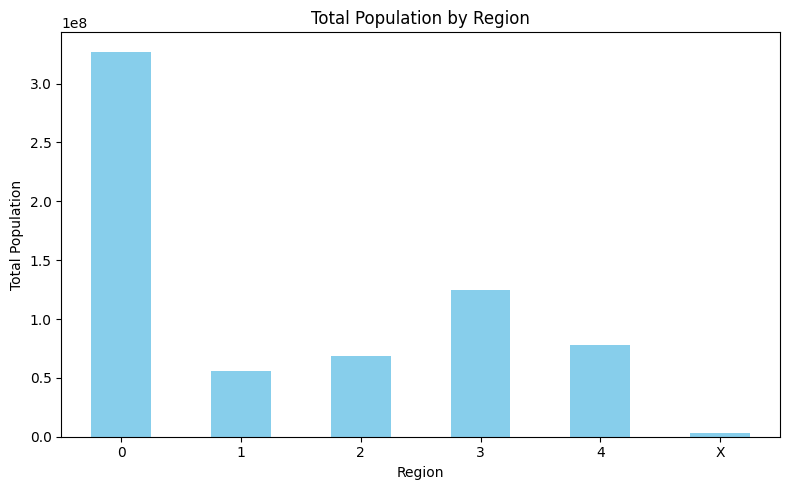

In [3]:


# 1. Compute the average population across all states
# Replace 'POPESTIMATE2018' with your actual population column name if different
average_population = df['POPESTIMATE2018'].mean()
print(f"Average population across all states: {average_population:,.0f}")

# 2. Find which region has the highest total population
region_totals = df.groupby('REGION')['POPESTIMATE2018'].sum()
print("Region total populations:")
print(region_totals)
top_region = region_totals.idxmax()
print(f"Region with highest total population: {top_region}")

# 3. Bar chart showing population by region
plt.figure(figsize=(8,5))
region_totals.plot(kind='bar', color='skyblue')
plt.title('Total Population by Region')
plt.xlabel('Region')
plt.ylabel('Total Population')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Q3. Parsing the JSON File (FHIR structure)

Using json module:

	1.	Load patient.json into a Python dictionary.

	2.	Extract and print:

	•	Patient’s full official name

	•	Gender and birth date

	•	Current address (city, state, postal code)
  
	3.	Count how many phone numbers the patient has, and list their types (e.g., work, mobile, home).

In [4]:
import json

# 1. Load patient.json into a Python dictionary
with open('/content/patient.json', 'r') as f:
    data = json.load(f)

# 2. Extract and print patient's details
# FHIR: official name is typically in 'name' where use=='official'
official_name = None
for n in data.get('name', []):
    if n.get('use') == 'official':
        official_name = ' '.join(n.get('given', [])) + ' ' + n.get('family', '')
        break
print("Patient's full official name:", official_name)

print("Gender:", data.get('gender'))
print("Birth Date:", data.get('birthDate'))

# Address (FHIR): usually a list, take first or one matching 'home'
address = data.get('address', [])[0]
print("City:", address.get('city'))
print("State:", address.get('state'))
print("Postal Code:", address.get('postalCode'))

# 3. Phone numbers (FHIR: telecom)
phones = [x for x in data.get('telecom', []) if x.get('system') == 'phone']
print("Number of phone numbers:", len(phones))
print("Phone types:", [x.get('use') for x in phones])


Patient's full official name: Peter James Chalmers
Gender: male
Birth Date: 1974-12-25
City: PleasantVille
State: Vic
Postal Code: 3999
Number of phone numbers: 3
Phone types: ['work', 'mobile', 'old']
